In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 40)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time

In [2]:
df = pd.read_pickle('../datasets/processed_clean/business_data_processed.pkl')
df = df.drop(df[df['is_closed'] == 0].sample(frac=.65).index) # delete 70 percent of non-closed restaurants

Let's take a look at our dataframe created by merging the old and new datasets and creating the new features.

In [3]:
df.head(3)

,business_id,business_name,categories,city,full_address,display_phone,review_count,stars,price_tag,is_claimed,is_closed,image,url,latitude,longitude,reviews_per_week,oldest_review,std_of_stars,median_of_stars,votes_per_week,stars_linear_coef,business_density,business_similar_density,zprice_all,zreview_count_all,zreview_per_week_all,zstar_all,is_chain
6,783c8371-6e20-4280-802e-ae3b1cd36294,Camping paradise,"[Cafe, Seafood, European]",Vlore County,"Perivol, Dhermi Albania",+355 67 289 3807,105.0,4.5,1.0,True,True,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.153465,19.615965,0.166667,90.000000,0.997775,5.0,0.055556,0.000901,24.0,29.0,-0.218750,0.694202,0.0,0.254167,False
7,9fd777c1-0d6a-4c99-ac18-aedd0e6d2635,Hercules Restaurant,"[Seafood, Mediterranean, European]",Vlore County,"Spile, Himare 9425 Albania",+355 69 580 0462,173.0,4.5,2.5,True,False,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.101074,19.744833,0.435685,34.428571,1.569147,5.0,0.000000,-0.027540,20.0,28.0,0.150000,-0.050080,0.0,-0.035000,False
12,432e7de3-2964-4ace-a67e-9cf54b8ae677,Vila Artur,"[Italian, Seafood]",Vlore County,"Shetitorja Dhermi, Dhermi Albania",+355 69 708 2803,4.0,3.0,1.0,False,False,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.141617,19.640263,0.035533,84.428571,1.699673,2.0,0.000000,-0.003644,29.0,28.0,-0.168103,-0.446941,0.0,-0.072414,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 6 to 4050
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   business_id               1795 non-null   object 
 1   business_name             1795 non-null   object 
 2   categories                1795 non-null   object 
 3   city                      1795 non-null   object 
 4   full_address              1795 non-null   object 
 5   display_phone             1582 non-null   object 
 6   review_count              1795 non-null   float64
 7   stars                     1795 non-null   float64
 8   price_tag                 1795 non-null   float64
 9   is_claimed                1795 non-null   bool   
 10  is_closed                 1795 non-null   bool   
 11  image                     1384 non-null   object 
 12  url                       1795 non-null   object 
 13  latitude                  1795 non-null   float64
 14  longitud

In [5]:
df.columns

Index(['business_id', 'business_name', 'categories', 'city', 'full_address',
       'display_phone', 'review_count', 'stars', 'price_tag', 'is_claimed',
       'is_closed', 'image', 'url', 'latitude', 'longitude',
       'reviews_per_week', 'oldest_review', 'std_of_stars', 'median_of_stars',
       'votes_per_week', 'stars_linear_coef', 'business_density',
       'business_similar_density', 'zprice_all', 'zreview_count_all',
       'zreview_per_week_all', 'zstar_all', 'is_chain'],
      dtype='object')

Percentage of closed restaurants? Might not be good!

In [6]:
len(df[df['is_closed'] == 1])/len(df)

0.32423398328690806

Plotting to see closed restaurants in proportion with non-closed restaurants

Text(0, 0.5, 'Total Number of Restaurants')

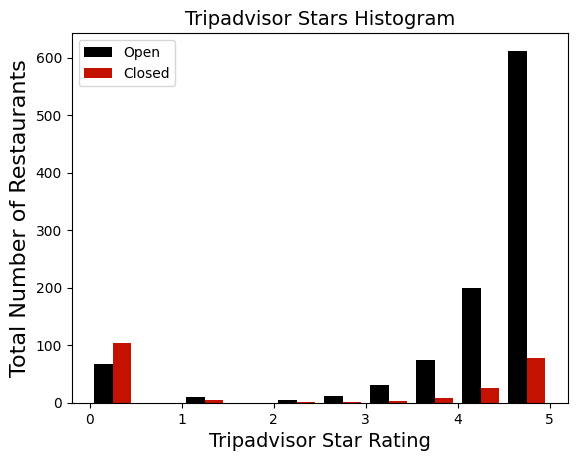

In [7]:
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Tripadvisor Stars Histogram',fontsize=14)
plt.xlabel('Tripadvisor Star Rating',fontsize=14)
plt.ylabel('Total Number of Restaurants',fontsize=16)

Text(0, 0.5, 'Integral Value')

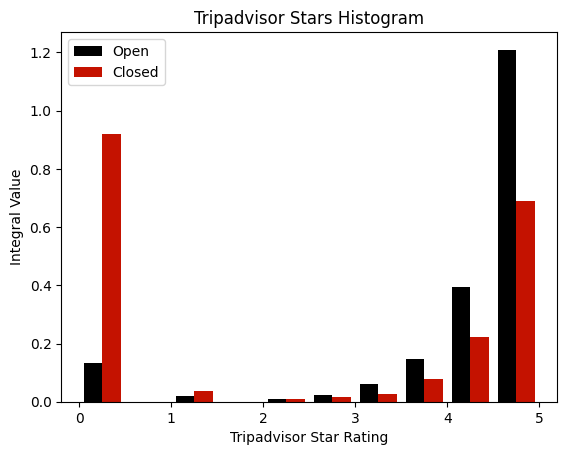

In [8]:
# The normed option normalizes in a way that the integral is 1 that means that the y-axis is not the percentage
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'], density=True)


plt.legend()
plt.title('Tripadvisor Stars Histogram')
plt.xlabel('Tripadvisor Star Rating')
plt.ylabel('Integral Value')

Text(0, 0.5, 'Percentages per Category (%)')

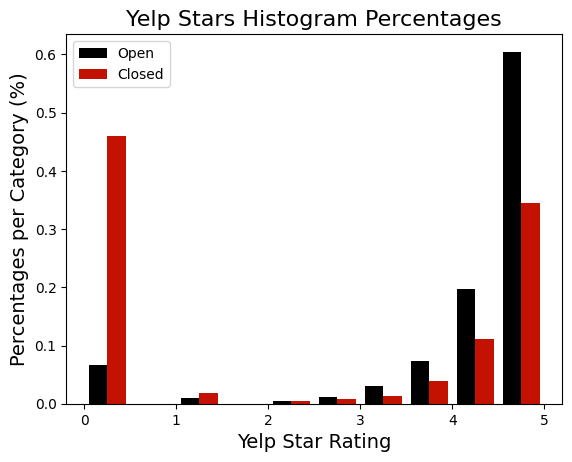

In [9]:
open_length = len(df[df['is_closed']==0].dropna()['stars'])
closed_length = len(df[df['is_closed']==1].dropna()['stars'])
weights = [np.ones(open_length)/open_length,np.ones(closed_length)/closed_length]
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],weights=weights)


plt.legend()
plt.title('Yelp Stars Histogram Percentages',fontsize=16)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Percentages per Category (%)',fontsize=14)

Text(0.5, 0, 'Total Number of Reviews')

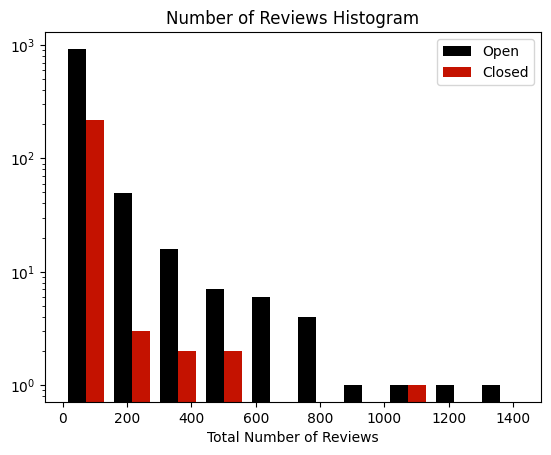

In [10]:
plt.hist([df[df['is_closed']==0].dropna()['review_count'].values,\
          df[df['is_closed']==1].dropna()['review_count'].values],\
        label=['Open','Closed'],color=['k','#c41200'],log=True)


plt.legend()
plt.title('Number of Reviews Histogram')
plt.xlabel('Total Number of Reviews')

Text(0.5, 1.0, 'Price')

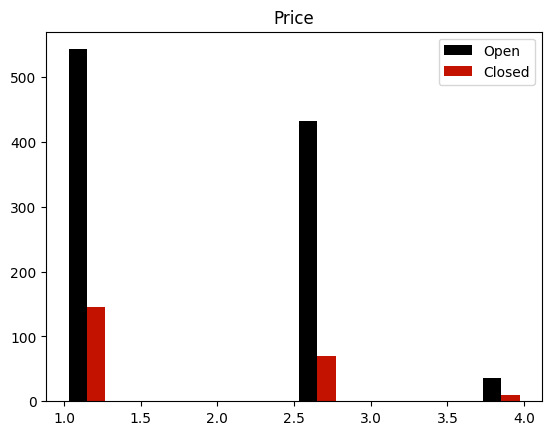

In [11]:
plt.hist([df[df['is_closed']==0].dropna()['price_tag'].values,\
          df[df['is_closed']==1].dropna()['price_tag'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Price')

In [12]:
df_ml = df[['review_count','stars','price_tag','oldest_review','std_of_stars','reviews_per_week',\
            'median_of_stars','votes_per_week','stars_linear_coef','business_density',\
            'business_similar_density','zreview_count_all','zstar_all','zprice_all','zreview_per_week_all',\
            'is_claimed','is_chain','is_closed']]

In [13]:
len(df_ml)

1795

In [14]:
for column in ['is_claimed', 'is_chain', 'is_closed']:
    df_ml[column] = df_ml[column].apply(lambda x: int(x))

/var/folders/tr/qq7qwqx91mq6jv07l_3ksqlm0000gn/T/ipykernel_14211/74214307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = df_ml[column].apply(lambda x: int(x))


In [15]:
df_ml_features = df_ml.drop('is_closed', axis=1)
df_ml_target = df_ml['is_closed']

In [16]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, make_scorer, confusion_matrix, roc_curve, matthews_corrcoef, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=2000)
grad_model = GradientBoostingClassifier(random_state=0)
lgbm_model = LGBMClassifier(random_state=0)
xgb_model = XGBClassifier(random_state=0)

models = [log_model, grad_model, lgbm_model, xgb_model]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

###### Testing some model before we get an intuitive and do search cross-validation

In [51]:
def view_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,list(y_train.values))
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('Accuracy:', (y_pred==y_test).mean())
    print('Mathews corrcoef:', matthews_corrcoef(y_test.values, y_pred))

In [19]:
def check_models(X_train, X_test, y_train, y_test):
    for model in models:
        print('Model:', type(model).__name__)
        view_model(model, X_train, X_test, y_train, y_test)
        print('#######################')

In [20]:
check_models(X_train, X_test, y_train, y_test)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       243
           1       0.73      0.72      0.73       116

    accuracy                           0.82       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.82      0.82      0.82       359

Mathews corrcoef: 0.5979250299095595
#######################
Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       243
           1       0.77      0.67      0.72       116

    accuracy                           0.83       359
   macro avg       0.81      0.79      0.80       359
weighted avg       0.83      0.83      0.83       359

Mathews corrcoef: 0.6009132208855095
#######################
Model: LGBMClassifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       243
           1       0.74      0.65

Analyzing models above

In [21]:
def analyze(model):
    print("analyzing model:", type(model).__name__)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

analyzing model: LogisticRegression


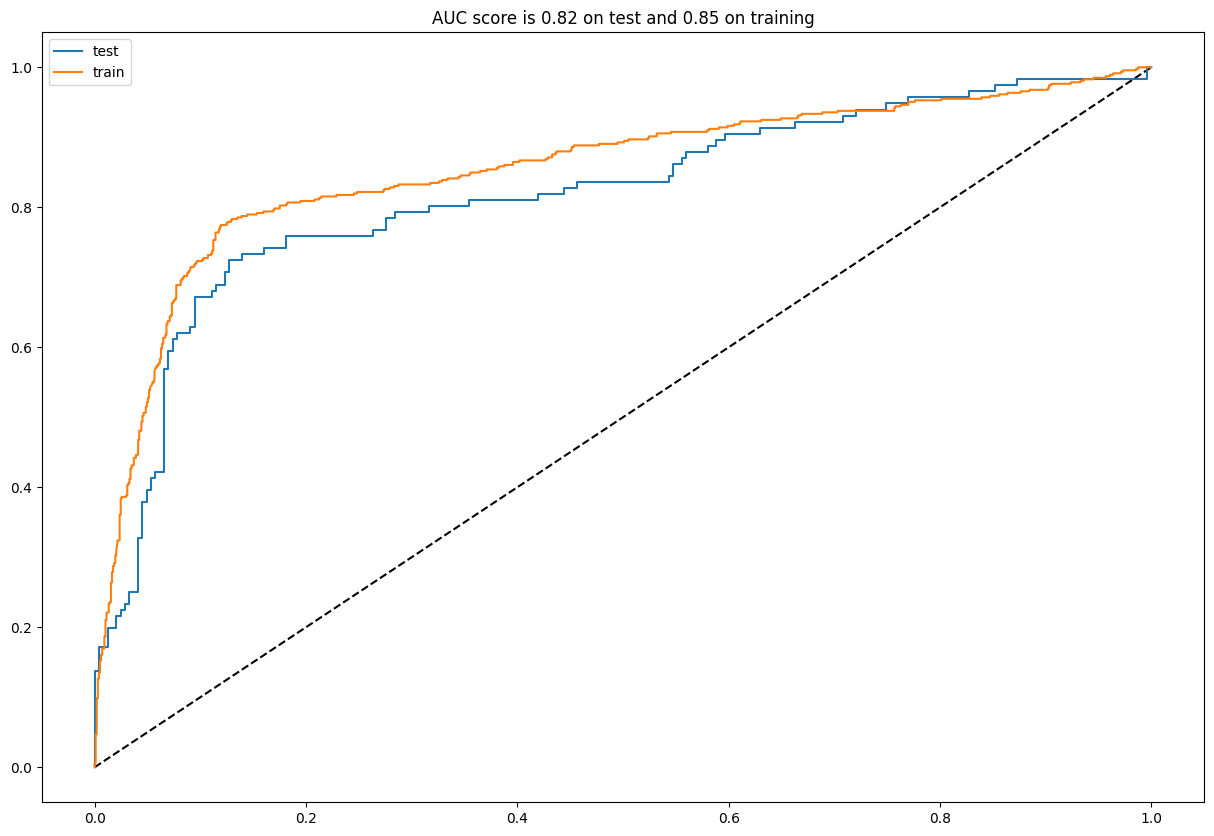

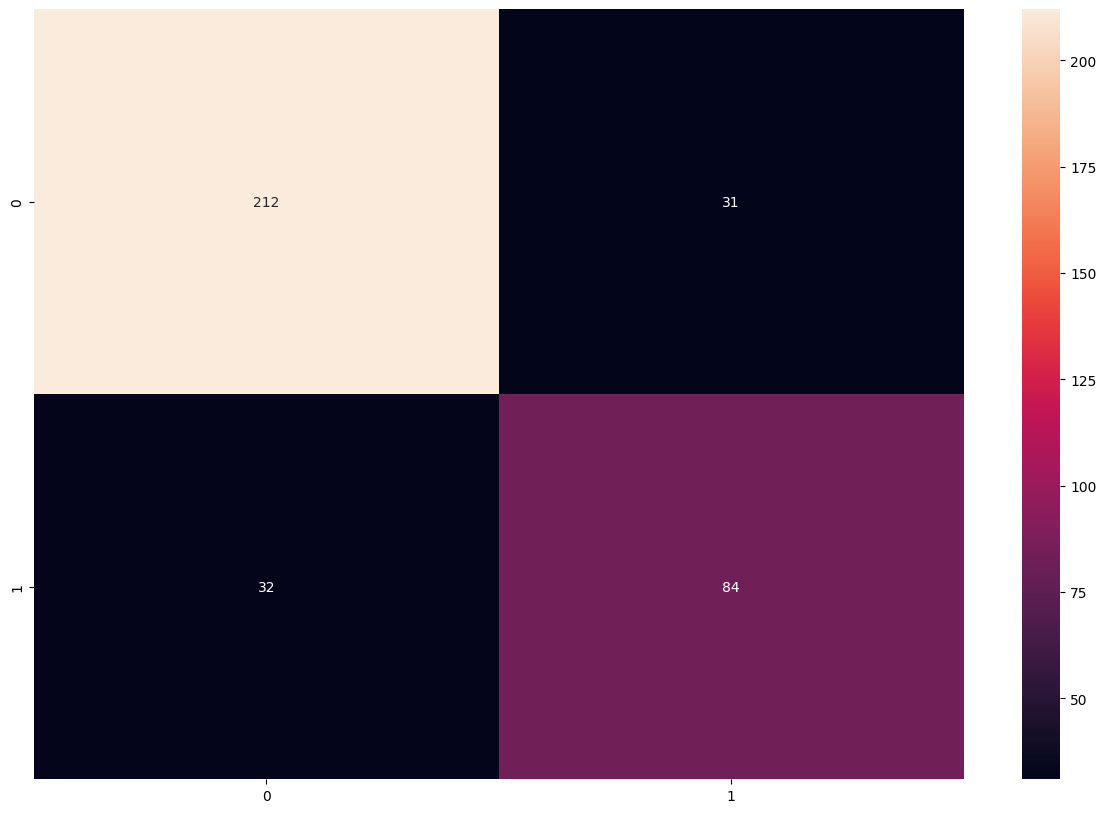

analyzing model: GradientBoostingClassifier


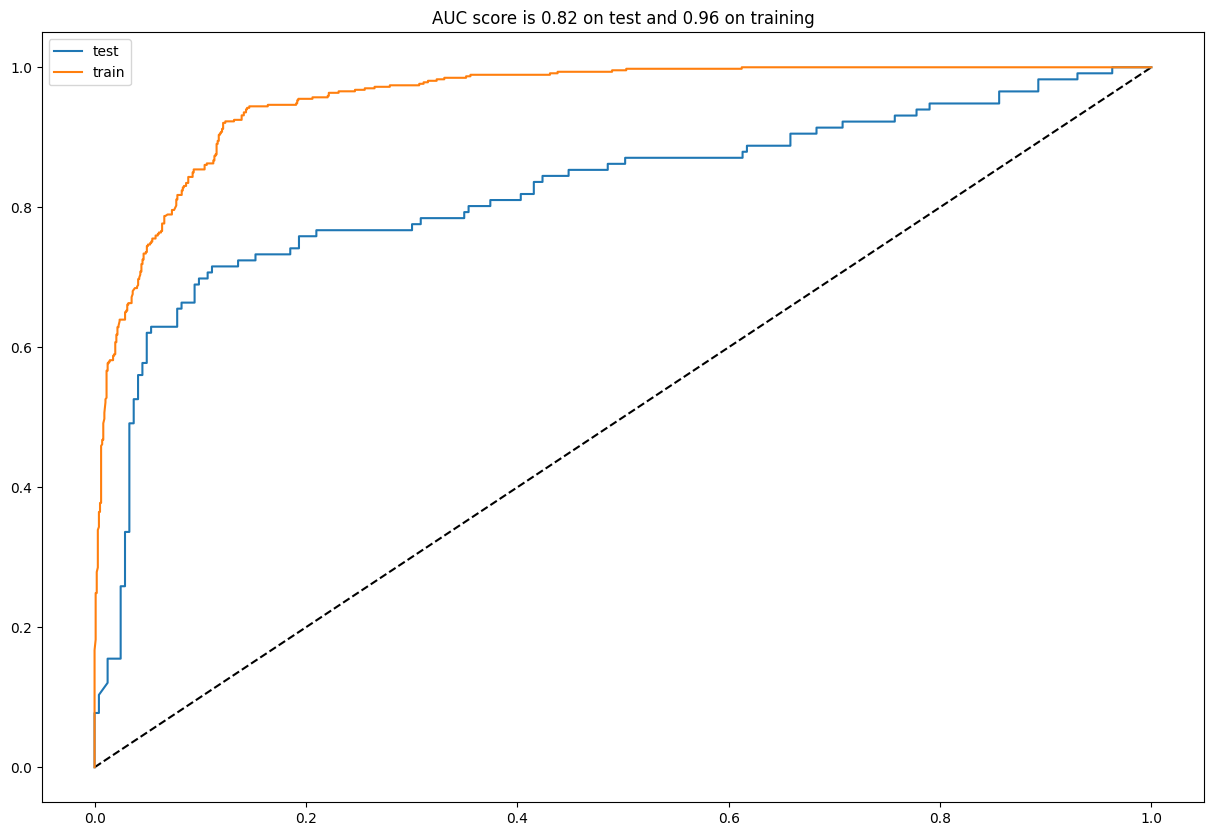

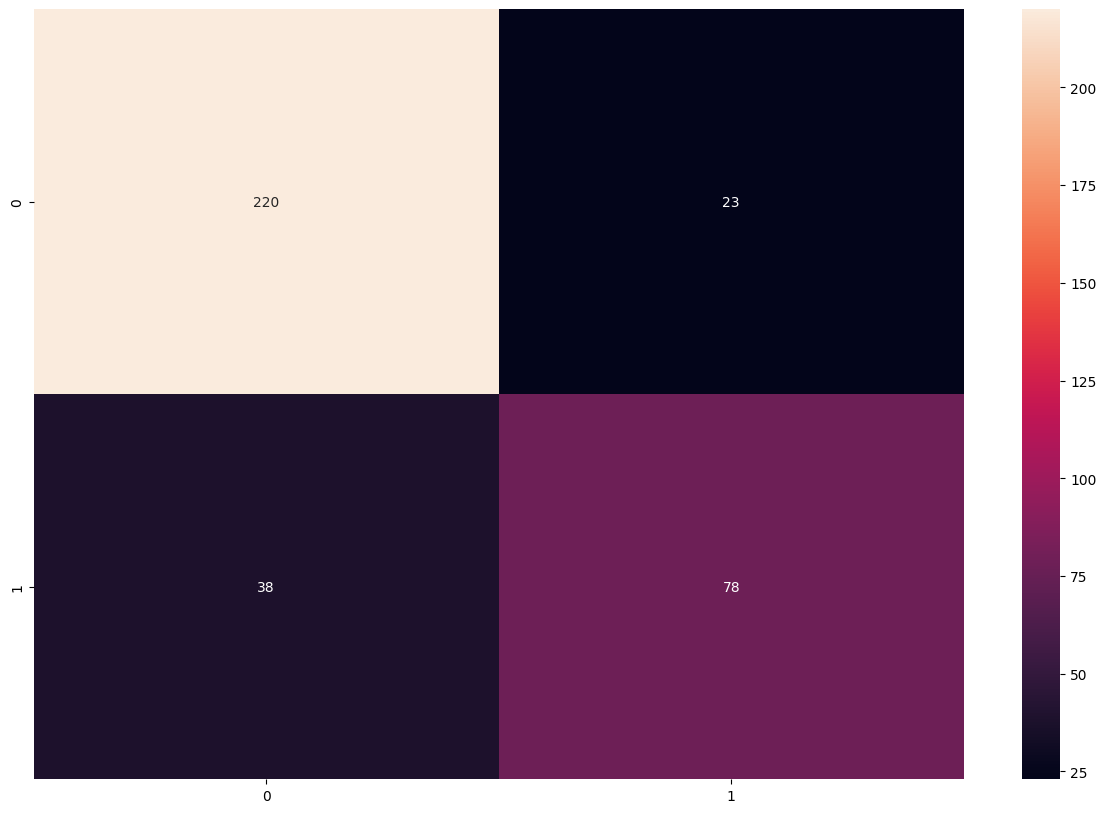

analyzing model: LGBMClassifier


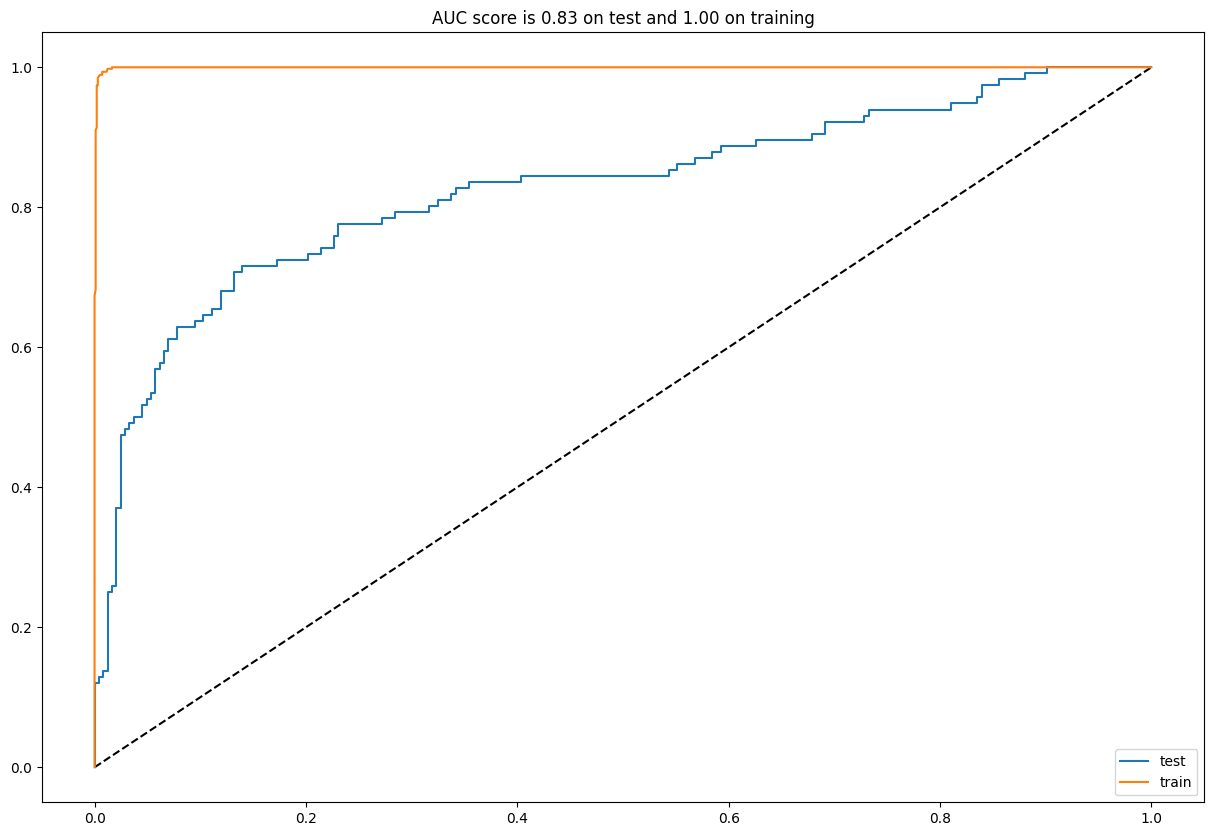

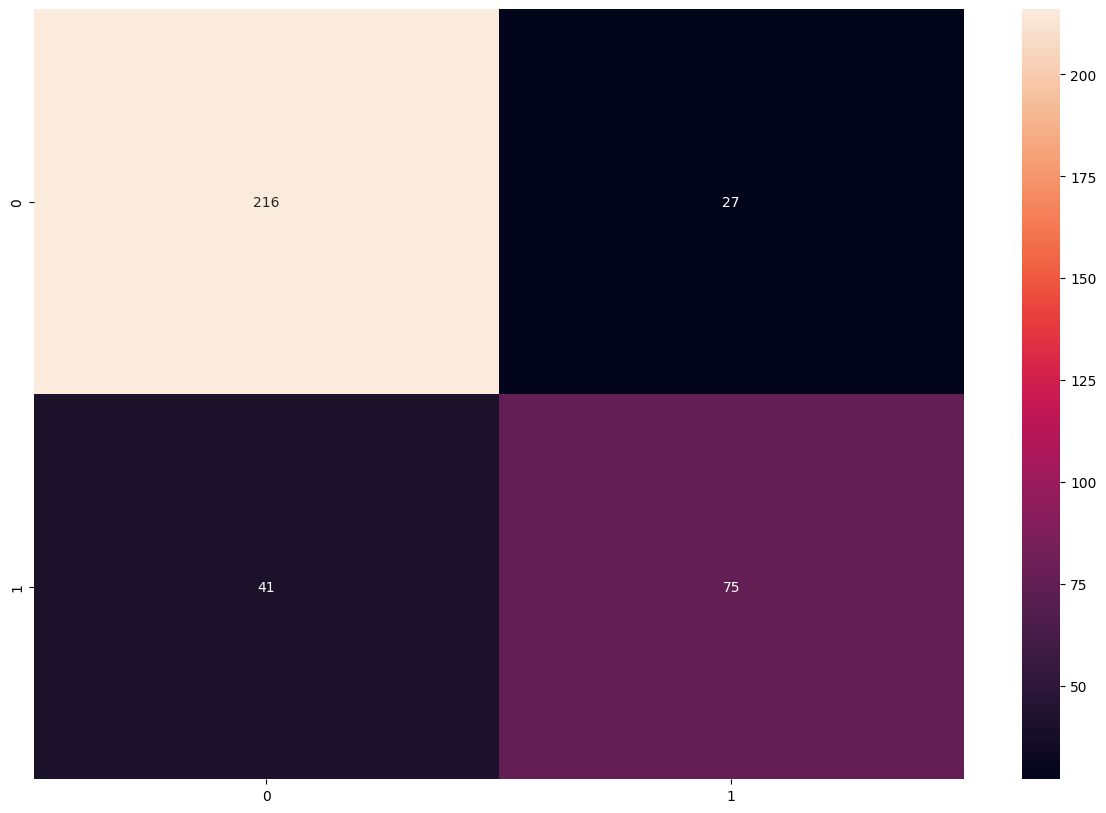

analyzing model: XGBClassifier


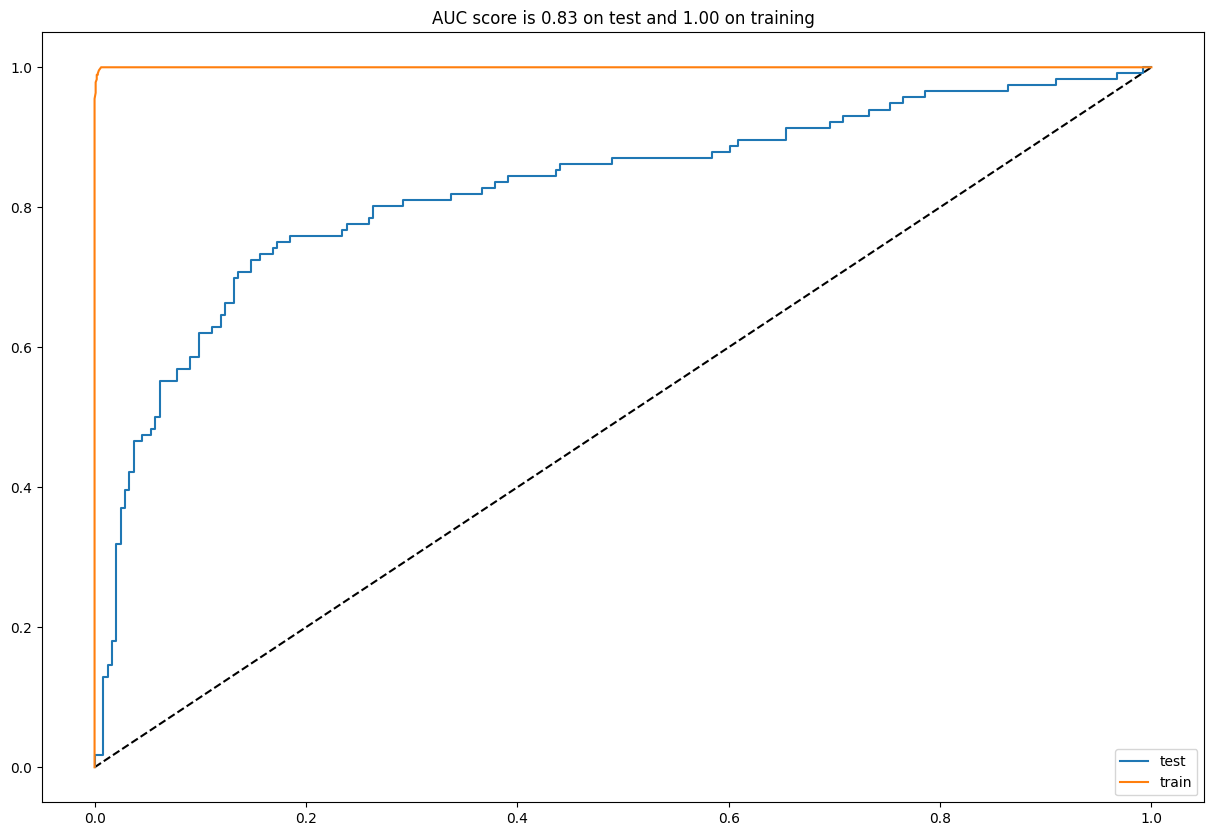

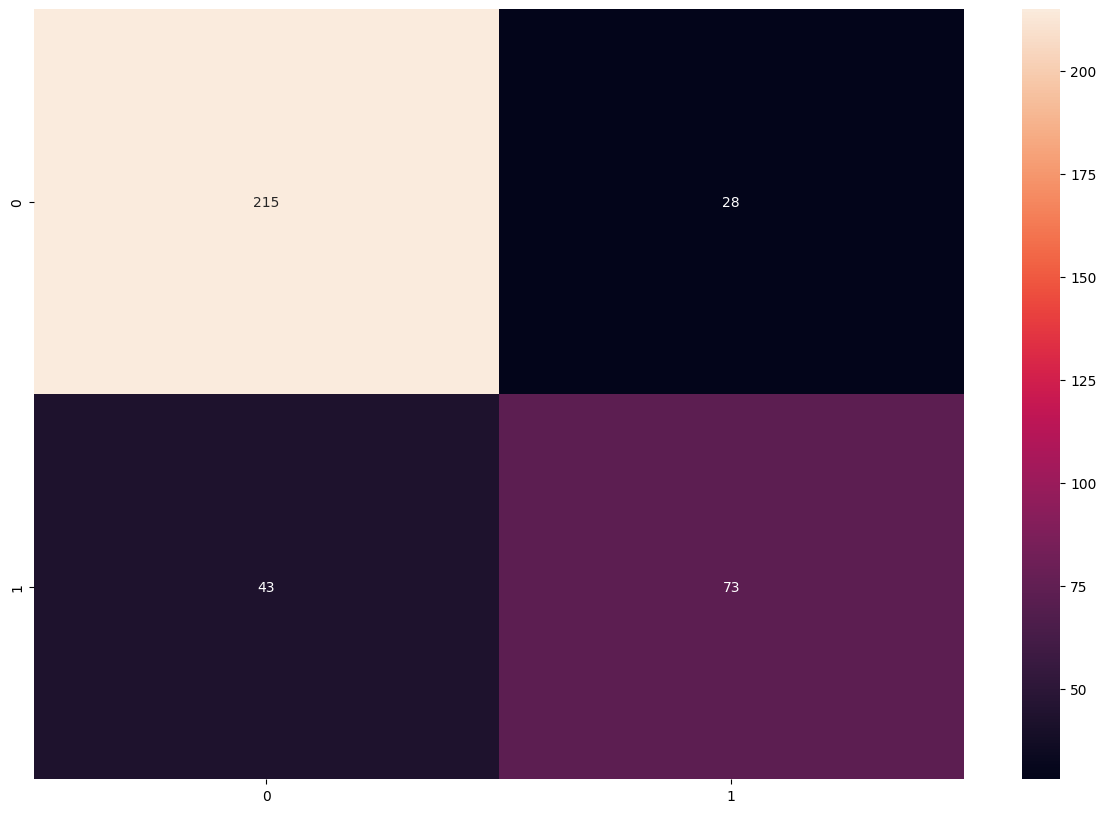

In [22]:
for model in models:
    analyze(model)
    time.sleep(2)

##### Ranking

Let's rank the features in terms of importance

In [23]:
def plot_features(importances, labels):
        # Random forest
    plt.figure(figsize=(10,7))
    plt.title("Feature importance")
    plt.barh(range(X_test.shape[1]), importances,
           color="#c41200", align="center")
    #plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
    plt.yticks(range(X_test.shape[1]), labels)
    plt.ylim([-1, X_test.shape[1]])
    plt.show()

In [24]:
def rank_features(model):
    if type(model).__name__ == 'LogisticRegression':
        importances = np.std(X_test, axis=0)*model.coef_[0]
    else:
        importances = model.feature_importances_
    #std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:", type(model).__name__)

    labels = []
    imp = []
    for f in range(X_test.shape[1]):
        labels.append(df_ml_features.iloc[:,indices[f]].name)
        if importances[indices[f]] < 0:
            imp.append(-importances[indices[f]])
        else:
            imp.append(importances[indices[f]])
        print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
        #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))
    
    plot_features(imp, labels)

### for model in models:
    rank_features(model)

Let's take a look at the histograms of the most important features

In [25]:
def plot_hist(column):
    plt.hist([df[df['is_closed']==0].dropna()[column].values,\
              df[df['is_closed']==1].dropna()[column].values],\
            label=['Open','Closed'], color=['k','#c41200'])


    plt.legend()
    plt.show()

In [26]:
# for column in ['zprice_all', 'review_count', 'zreview_count_all']:
#     print(column)
#     plot_hist(column)

#### Scaling
Scaling the features might have an effect on the Logistic Regression algorithm since L2 Regularization is used. Let's use the sklearn standard scaler.

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
check_models(X_train, X_test, y_train, y_test)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       243
           1       0.73      0.72      0.73       116

    accuracy                           0.82       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.82      0.82      0.82       359

Mathews corrcoef: 0.5979250299095595
#######################
Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       243
           1       0.77      0.67      0.72       116

    accuracy                           0.83       359
   macro avg       0.81      0.79      0.80       359
weighted avg       0.83      0.83      0.83       359

Mathews corrcoef: 0.6009132208855095
#######################
Model: LGBMClassifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       243
           1       0.77      0.64

analyzing model: LogisticRegression


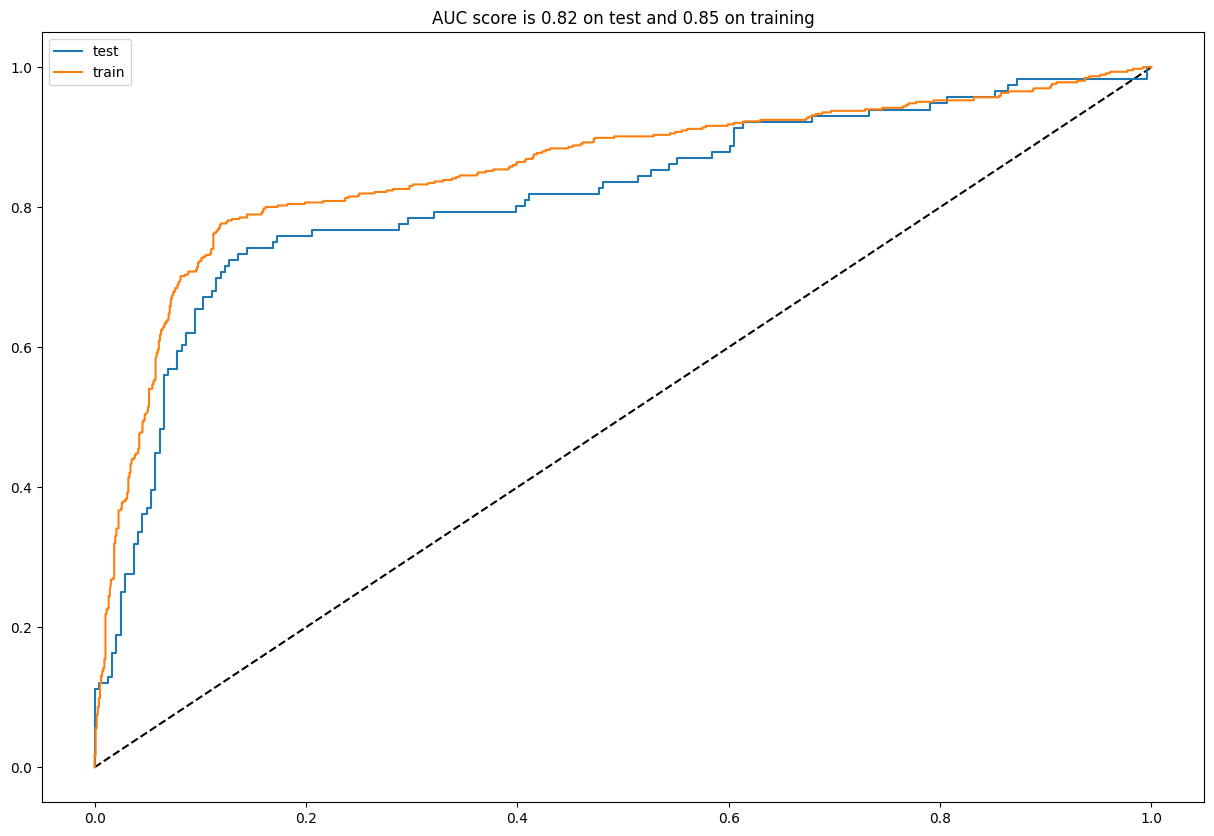

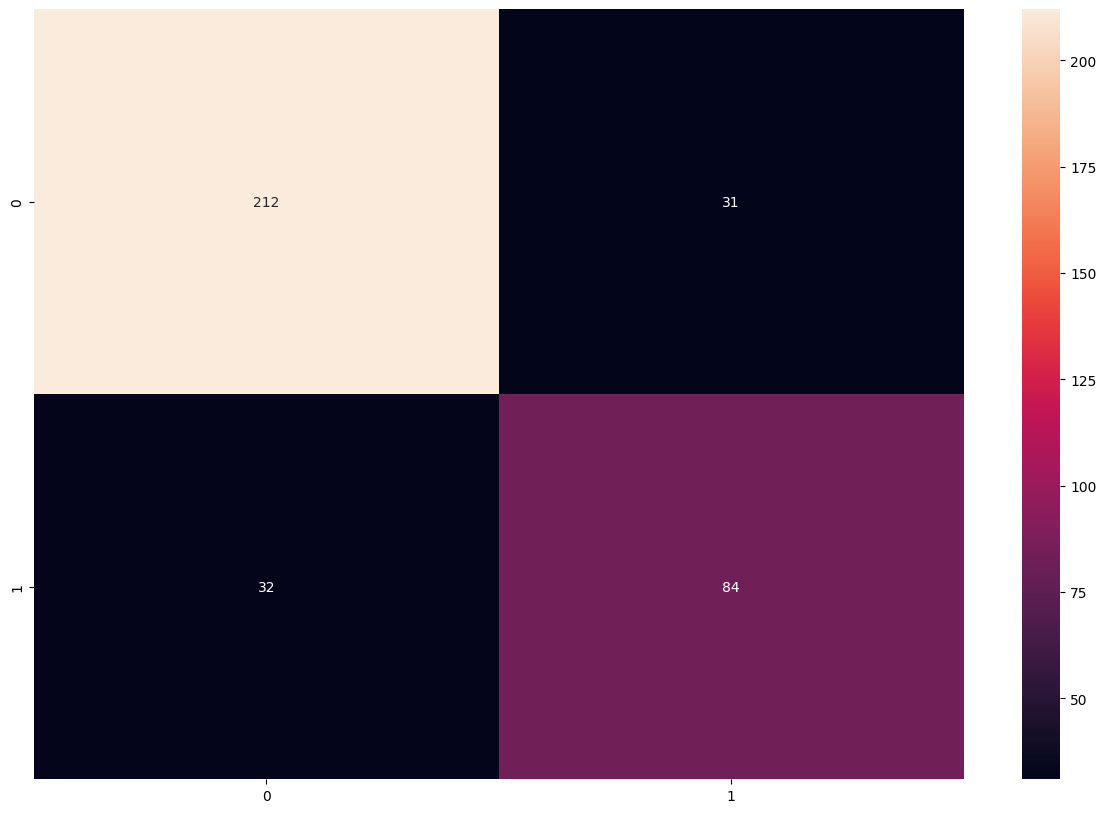

analyzing model: GradientBoostingClassifier


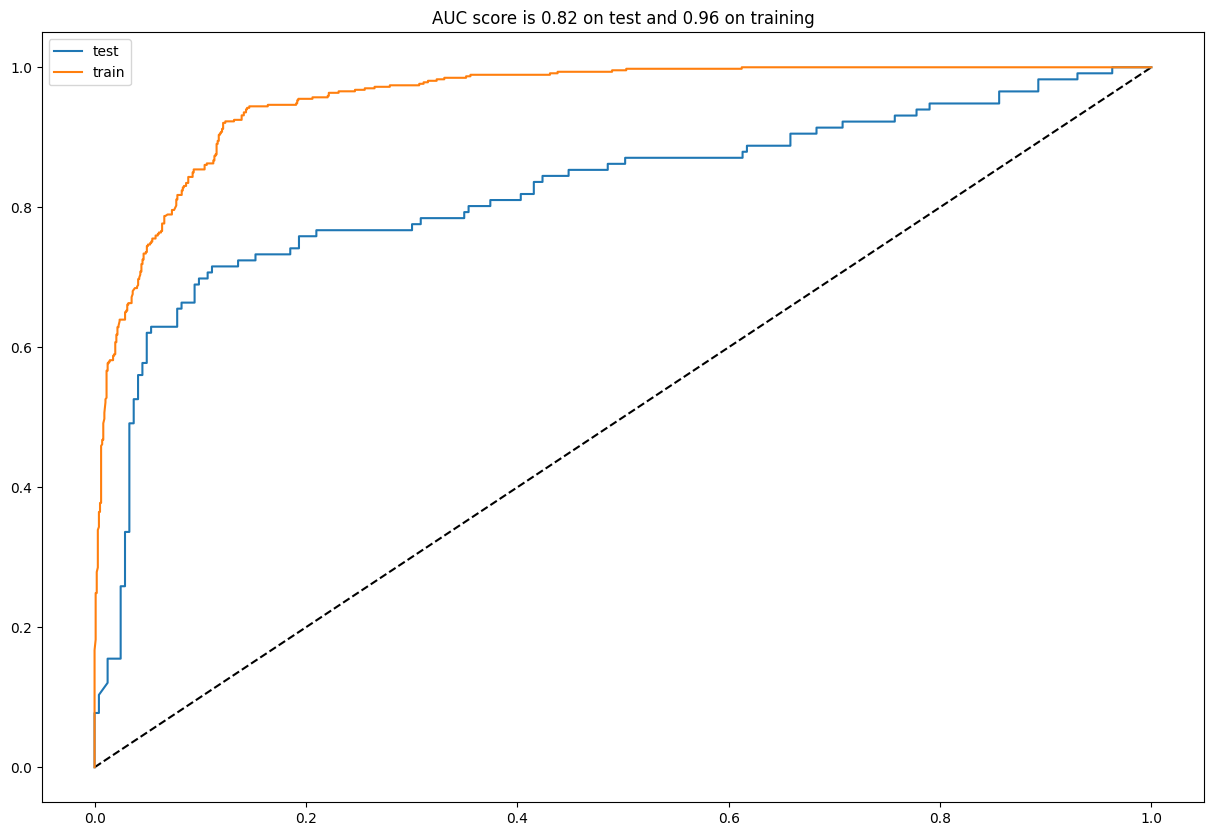

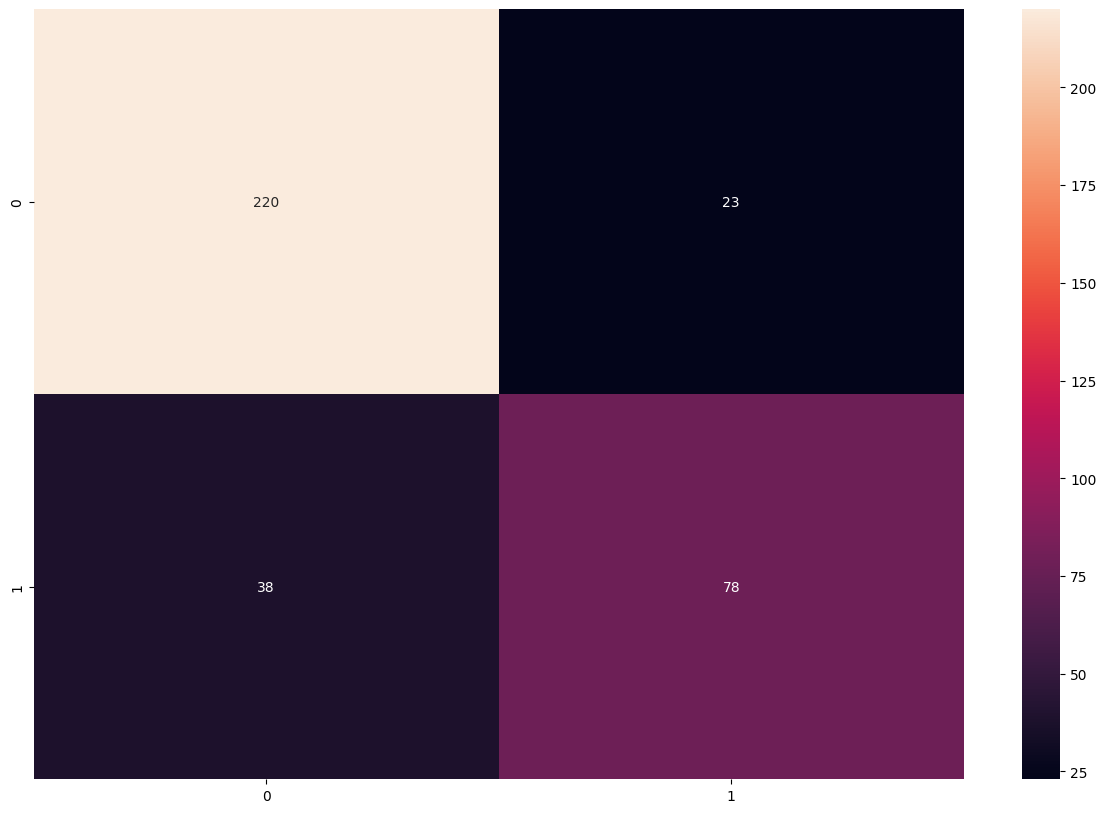

analyzing model: LGBMClassifier


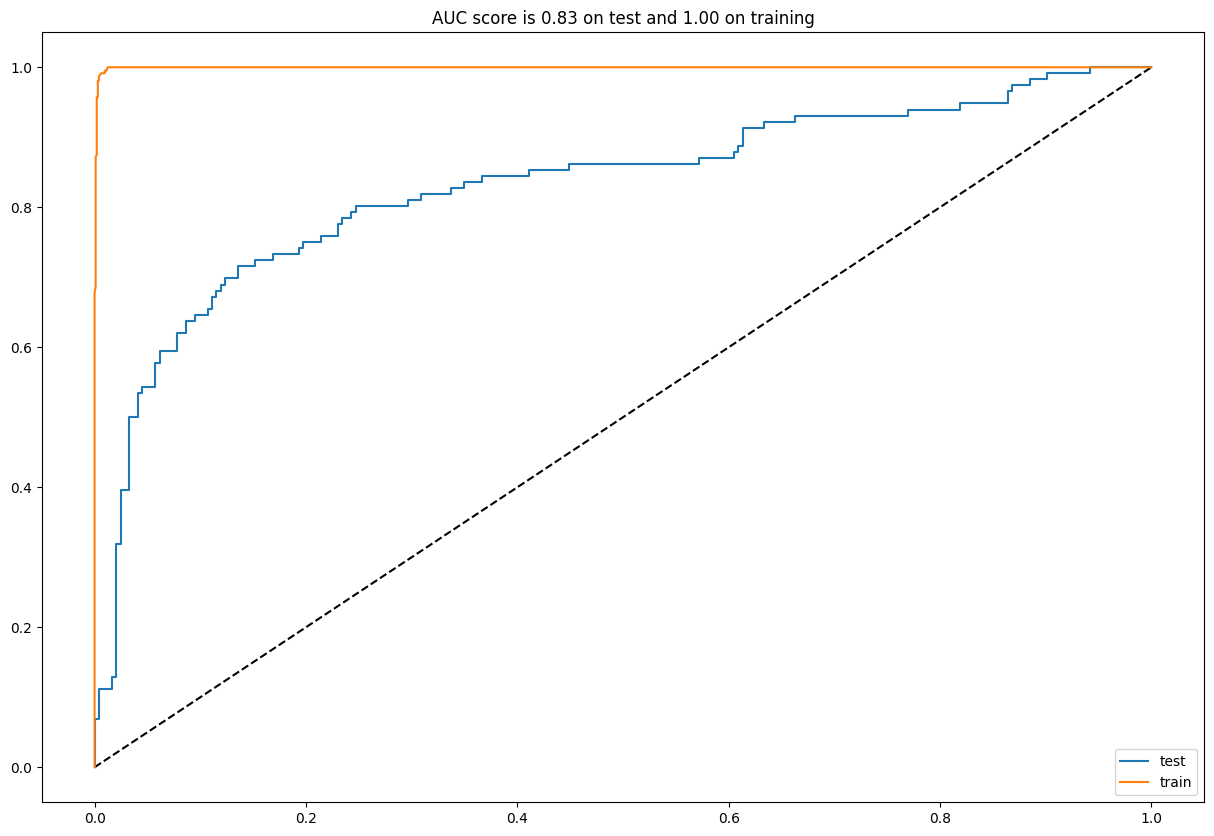

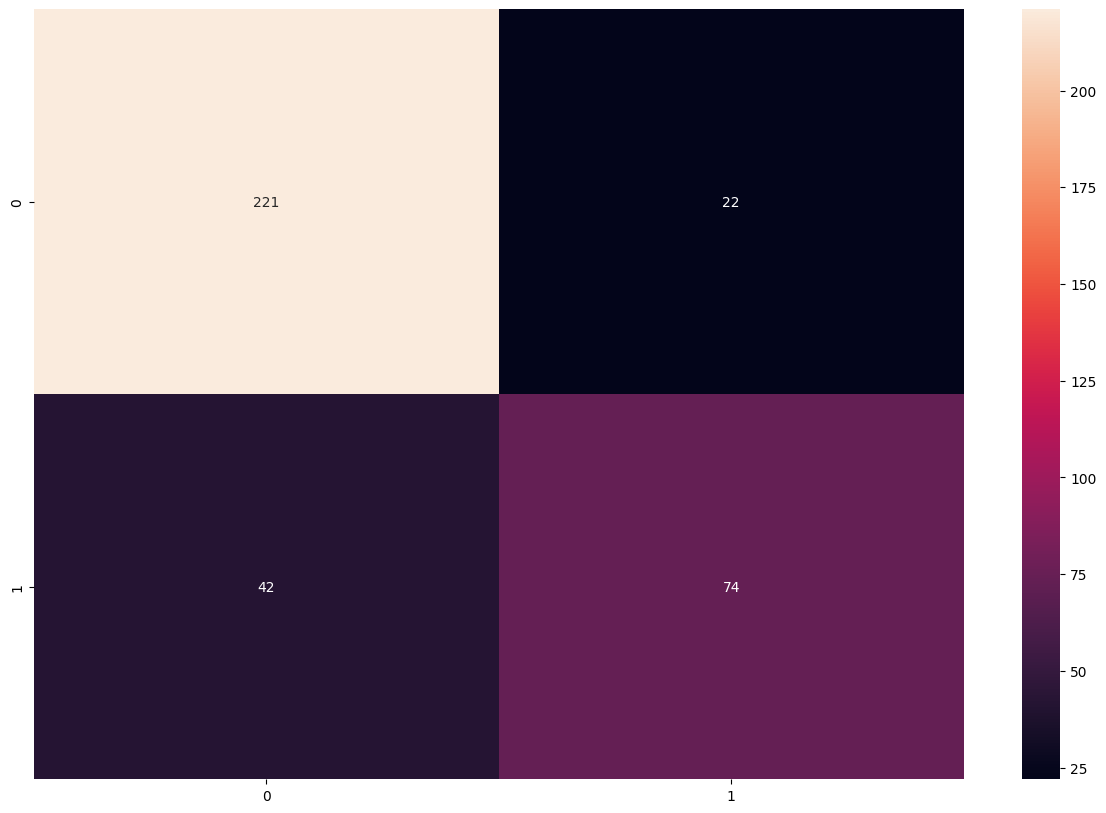

analyzing model: XGBClassifier


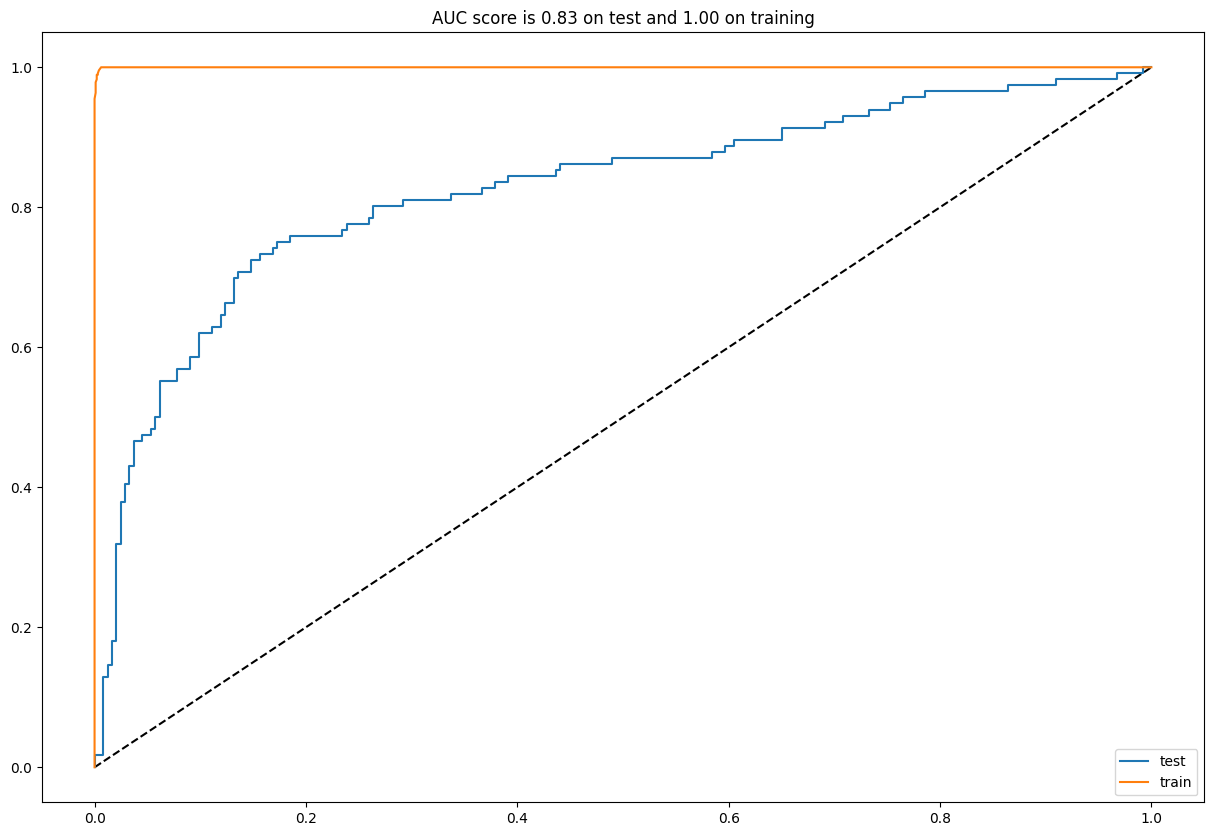

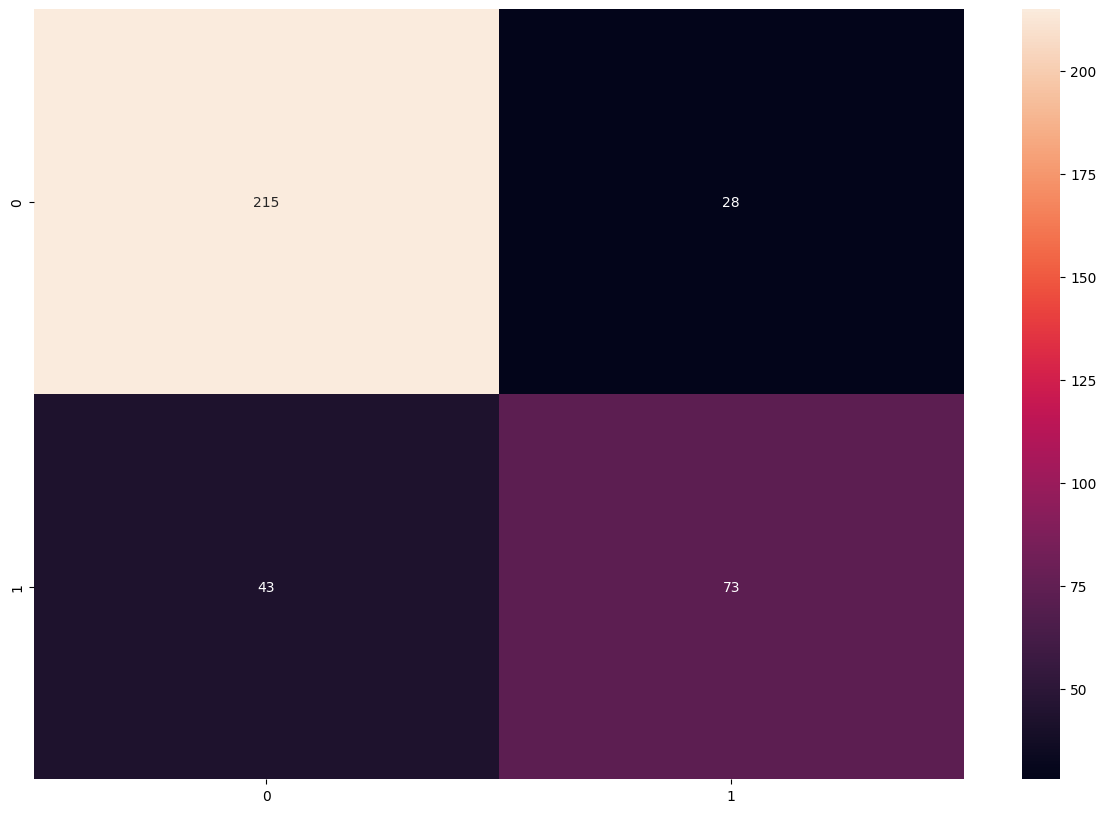

In [30]:
for model in models:
    analyze(model)

## Grid Search with Cross Validation

We will apply Grid Search and cross validation to optimize the parameters. The targeting application in which to decide the restaurant to provide loan on.

For example, we will try to optimize precision (considering restaurants not closing as the positive result) as we want to minimize the number of false positives. (i.e. restaurants that will fail but are recognized as not failing).

#### Logistic Regression Model CV

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'penalty' : ['l2'],
              'C': [0.01,0.1,1.,10.],
              'intercept_scaling': [0.0005,0.001,0.005,0.01,0.1,1.,10.]}

scorer = make_scorer(precision_score, pos_label=False)
gscv_log = GridSearchCV(log_model, param_grid, scoring=scorer)
gscv_log.fit(X_train, y_train.values)

GridSearchCV(estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'intercept_scaling': [0.0005, 0.001, 0.005, 0.01, 0.1,
                                               1.0, 10.0],
                         'penalty': ['l2']},
             scoring=make_scorer(precision_score, pos_label=False))

In [34]:
gscv_log.best_params_

{'C': 0.01, 'intercept_scaling': 0.0005, 'penalty': 'l2'}

In [35]:
logistic_model_optimized = gscv_log.best_estimator_

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       243
           1       0.73      0.72      0.72       116

    accuracy                           0.82       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.82      0.82      0.82       359

Accuracy: 0.8245125348189415
Mathews corrcoef: 0.5961992260946029
analyzing model: LogisticRegression


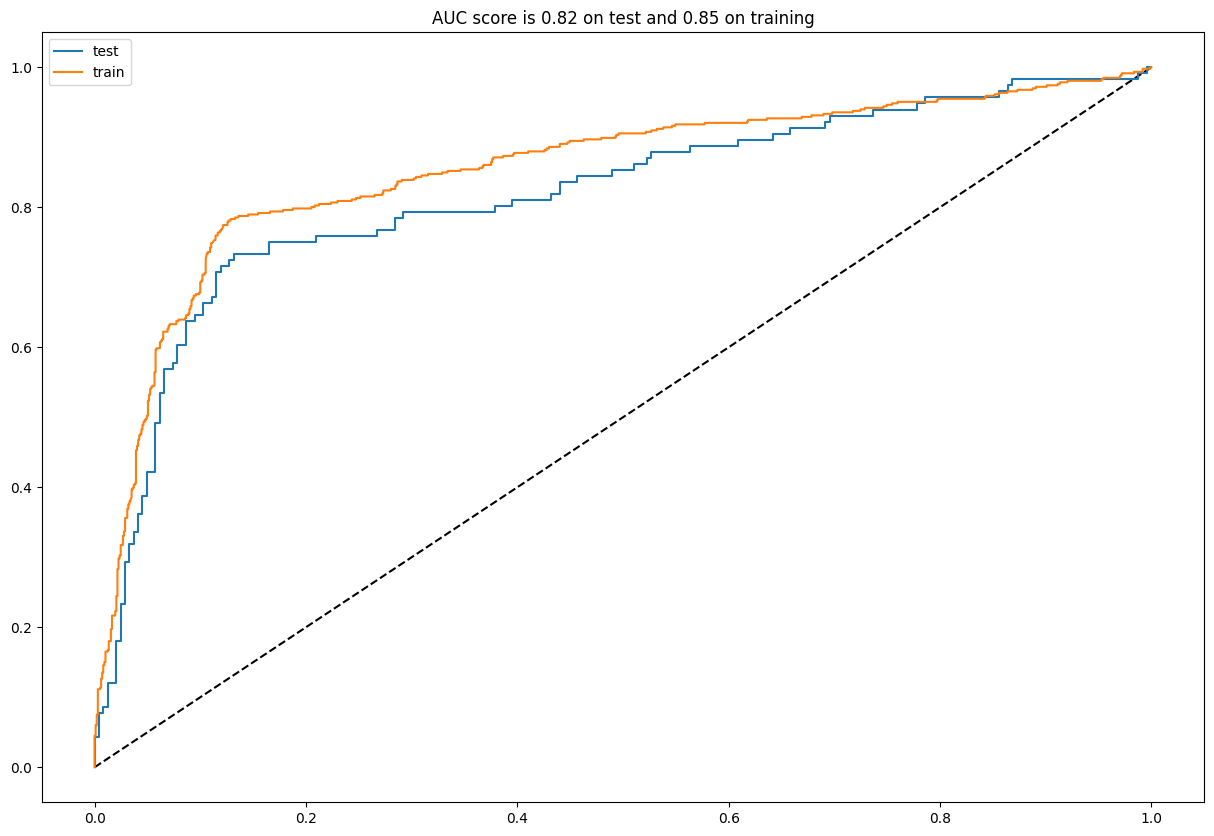

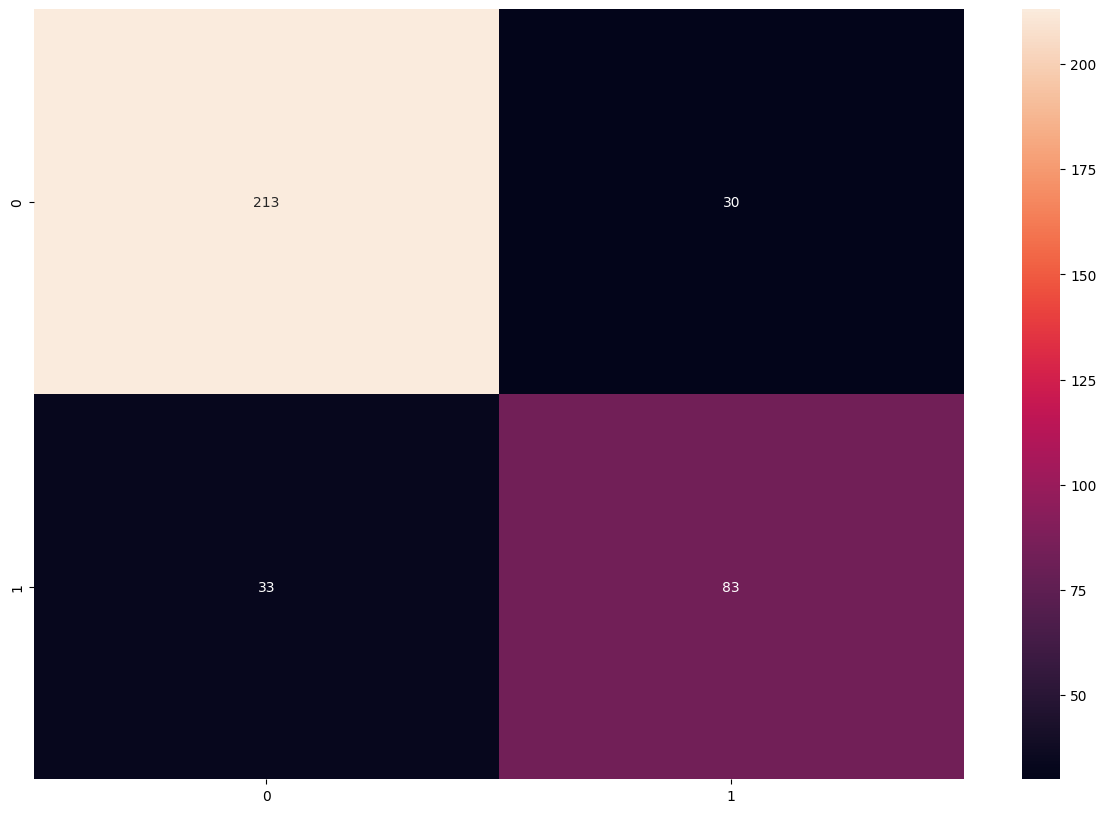

Feature ranking: LogisticRegression
1. feature: median_of_stars (0.108069)
2. feature: zprice_all (0.076263)
3. feature: business_similar_density (0.037517)
4. feature: stars_linear_coef (0.026111)
5. feature: is_chain (0.001016)
6. feature: zreview_per_week_all (0.000000)
7. feature: review_count (-0.027215)
8. feature: price_tag (-0.034646)
9. feature: votes_per_week (-0.037902)
10. feature: reviews_per_week (-0.039784)
11. feature: zreview_count_all (-0.050851)
12. feature: business_density (-0.050852)
13. feature: std_of_stars (-0.171462)
14. feature: is_claimed (-0.183599)
15. feature: zstar_all (-0.362714)
16. feature: oldest_review (-0.400900)
17. feature: stars (-0.536970)


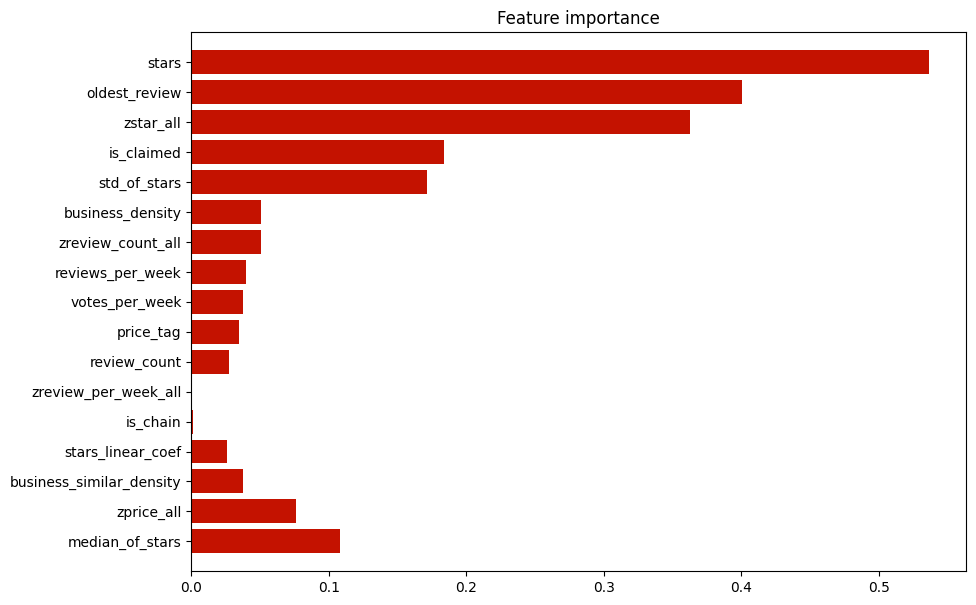

In [52]:
view_model(logistic_model_optimized, X_train, X_test, y_train, y_test)
analyze(logistic_model_optimized)
rank_features(logistic_model_optimized)

#### Gradient Boosting Model CV

In [55]:
param_grid = {'n_estimators': [150,100,150,200],\
                'max_depth': [3,4,5], \
                'min_samples_split': [3,4,5,6,8],\
                'max_features': [4,5,6]}

gscv_grad = GridSearchCV(grad_model, param_grid, scoring=scorer)
gscv_grad.fit(X_train, y_train.values)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5], 'max_features': [4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 8],
                         'n_estimators': [150, 100, 150, 200]},
             scoring=make_scorer(precision_score, pos_label=False))

In [56]:
gscv_grad.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [57]:
grad_model_optimized = gscv_grad.best_estimator_

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       243
           1       0.78      0.70      0.74       116

    accuracy                           0.84       359
   macro avg       0.82      0.80      0.81       359
weighted avg       0.84      0.84      0.84       359

Accuracy: 0.8384401114206128
Mathews corrcoef: 0.6223190022010835
analyzing model: GradientBoostingClassifier


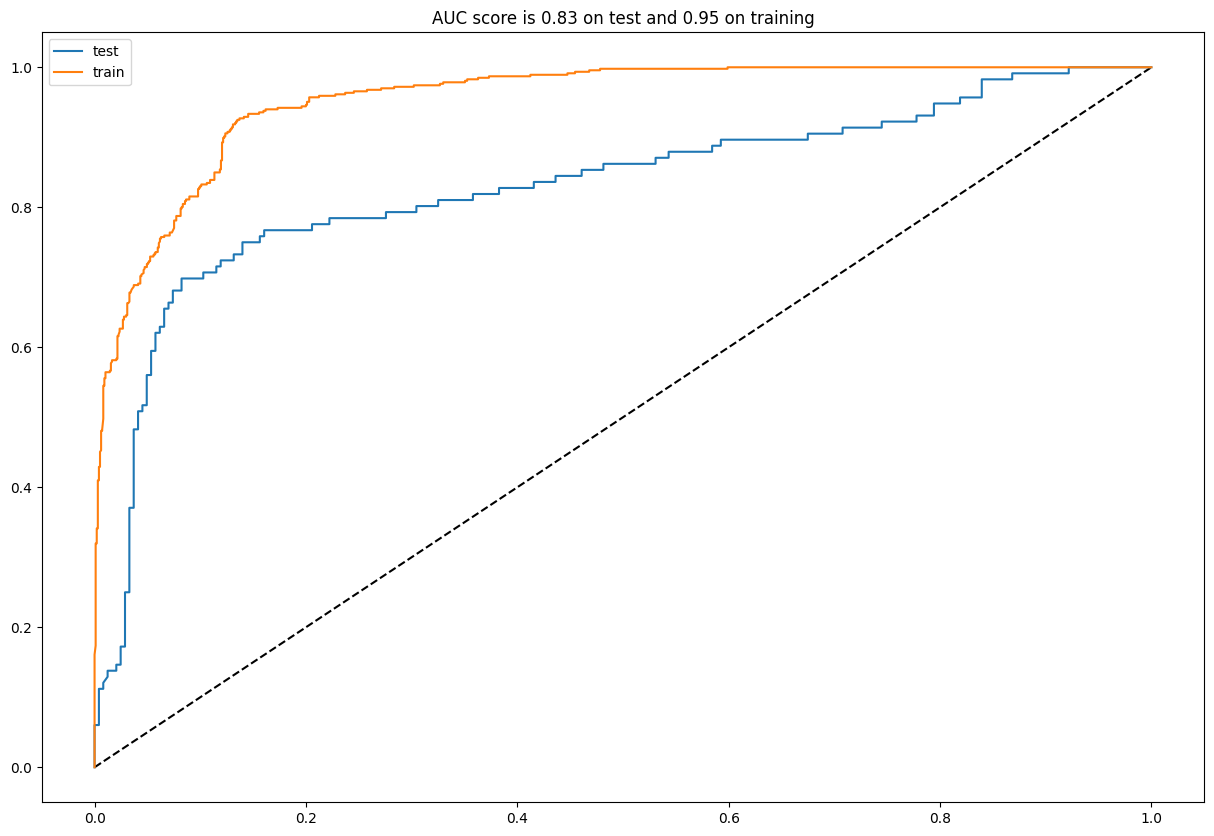

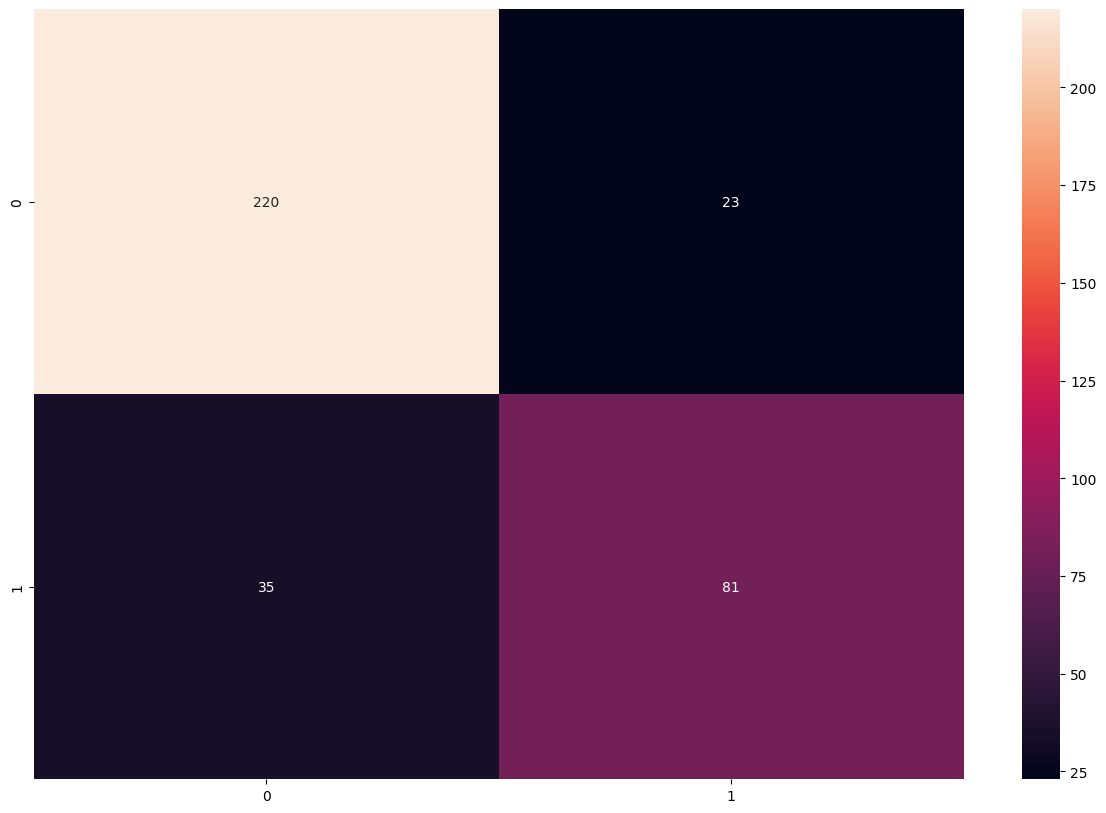

Feature ranking: GradientBoostingClassifier
1. feature: oldest_review (0.242452)
2. feature: stars (0.184843)
3. feature: reviews_per_week (0.165730)
4. feature: zstar_all (0.139432)
5. feature: review_count (0.055867)
6. feature: is_claimed (0.049645)
7. feature: zprice_all (0.029201)
8. feature: business_density (0.026642)
9. feature: business_similar_density (0.025927)
10. feature: zreview_count_all (0.025182)
11. feature: stars_linear_coef (0.024865)
12. feature: std_of_stars (0.010545)
13. feature: median_of_stars (0.007865)
14. feature: votes_per_week (0.007137)
15. feature: price_tag (0.002377)
16. feature: is_chain (0.002290)
17. feature: zreview_per_week_all (0.000000)


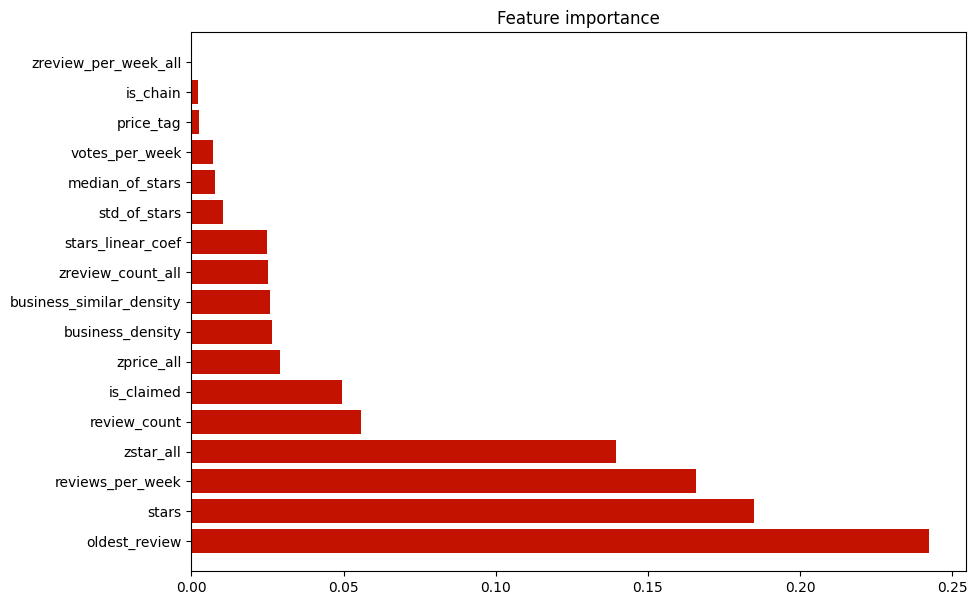

In [58]:
view_model(grad_model_optimized, X_train, X_test, y_train, y_test)
analyze(grad_model_optimized)
rank_features(grad_model_optimized)

#### Light GBM Model CV

In [43]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

gscv_lgbm = GridSearchCV(lgbm_model, param_grid, scoring=scorer)
gscv_lgbm.fit(X_train, y_train.values)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

GridSearchCV(estimator=LGBMClassifier(random_state=0),
             param_grid={'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1],
                         'min_data_in_leaf': [100, 300, 400],
                         'num_leaves': [31, 127], 'reg_alpha': [0.1, 0.5]},
             scoring=make_scorer(precision_score, pos_label=False))

In [44]:
gscv_lgbm.best_params_

{'lambda_l1': 0,
 'lambda_l2': 0,
 'min_data_in_leaf': 400,
 'num_leaves': 31,
 'reg_alpha': 0.1}

In [45]:
lgbm_model_optimized = gscv_lgbm.best_estimator_

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       243
           1       0.74      0.72      0.73       116

    accuracy                           0.83       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.83      0.83      0.83       359

Accuracy: 0.8272980501392758
Mathews corrcoef: 0.6034491231069108
analyzing model: LGBMClassifier


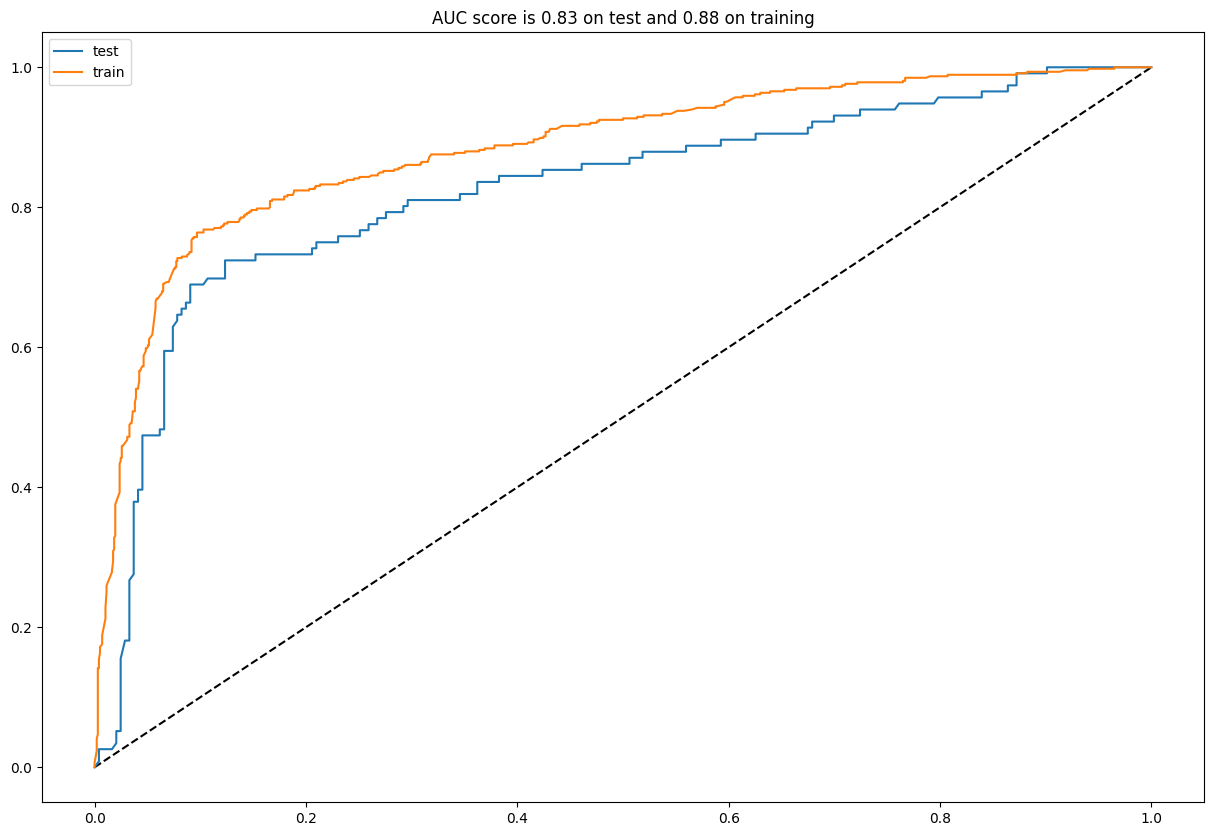

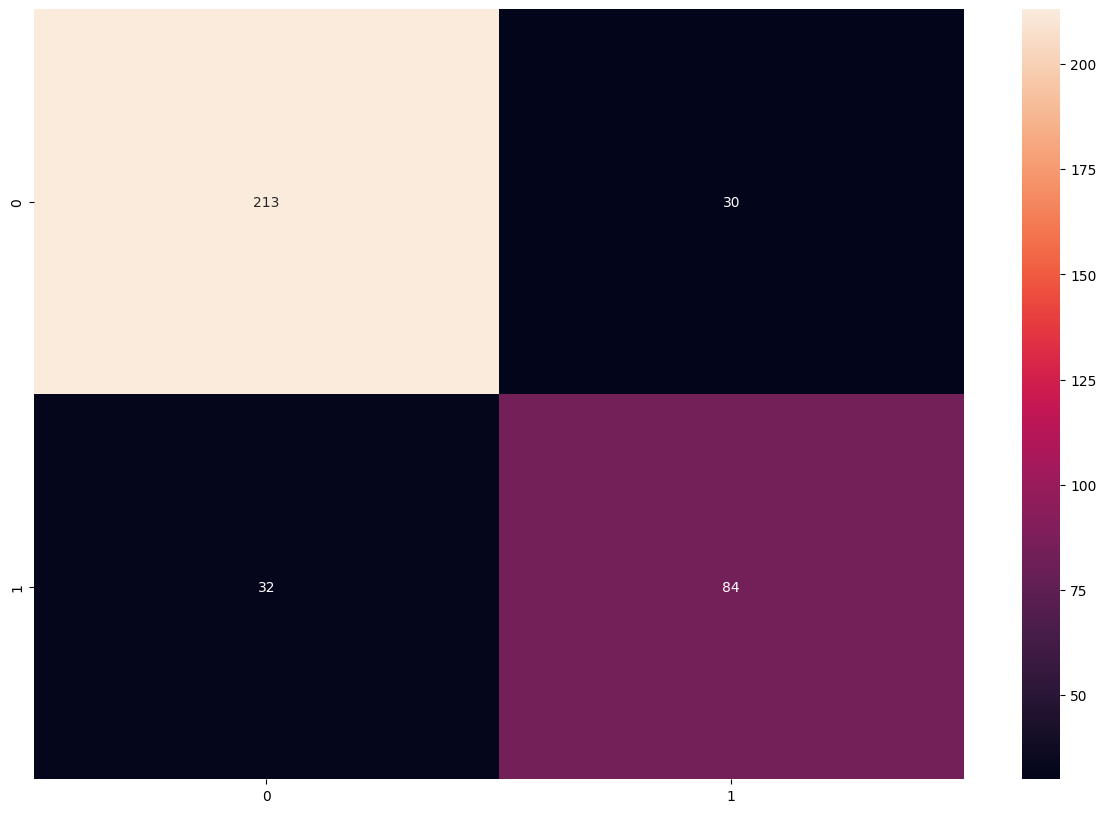

Feature ranking: LGBMClassifier
1. feature: is_claimed (33.000000)
2. feature: zstar_all (29.000000)
3. feature: business_density (25.000000)
4. feature: business_similar_density (22.000000)
5. feature: zreview_count_all (18.000000)
6. feature: review_count (17.000000)
7. feature: oldest_review (13.000000)
8. feature: zprice_all (10.000000)
9. feature: stars (7.000000)
10. feature: median_of_stars (6.000000)
11. feature: votes_per_week (4.000000)
12. feature: reviews_per_week (1.000000)
13. feature: price_tag (0.000000)
14. feature: is_chain (0.000000)
15. feature: std_of_stars (0.000000)
16. feature: zreview_per_week_all (0.000000)
17. feature: stars_linear_coef (0.000000)


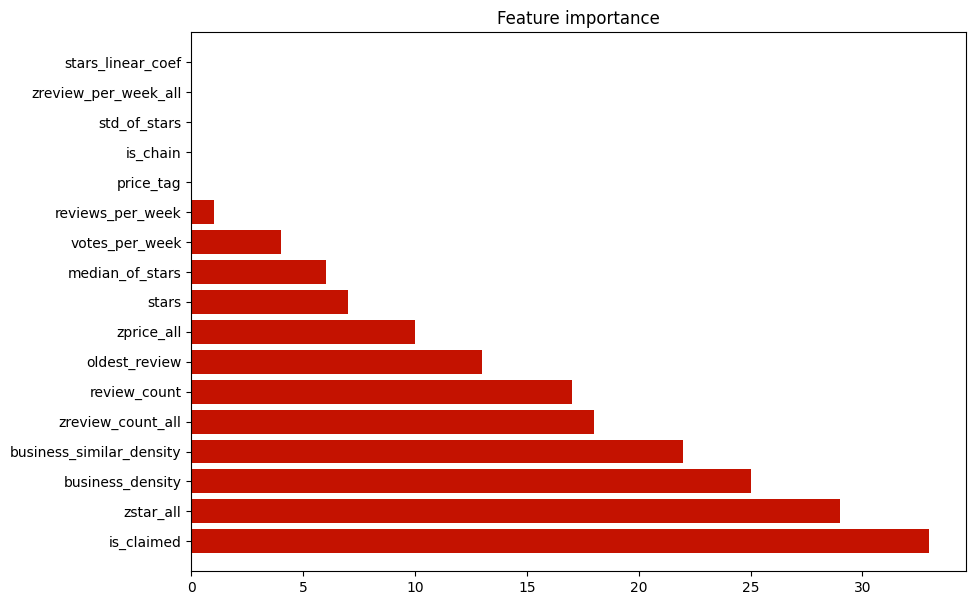

In [53]:
view_model(lgbm_model_optimized, X_train, X_test, y_train, y_test)
analyze(lgbm_model_optimized)
rank_features(lgbm_model_optimized)

XGBoost Model CV

In [47]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
gscv_xgb = GridSearchCV(xgb_model, param_grid, scoring=scorer)
gscv_xgb.fit(X_train, y_train.values)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring=make_scorer(precision_score, pos_label=False))

In [48]:
gscv_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [49]:
xgb_model_optimized = gscv_xgb.best_estimator_

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       243
           1       0.78      0.66      0.72       116

    accuracy                           0.83       359
   macro avg       0.81      0.79      0.80       359
weighted avg       0.83      0.83      0.83       359

Accuracy: 0.83008356545961
Mathews corrcoef: 0.5998989174795203
analyzing model: XGBClassifier


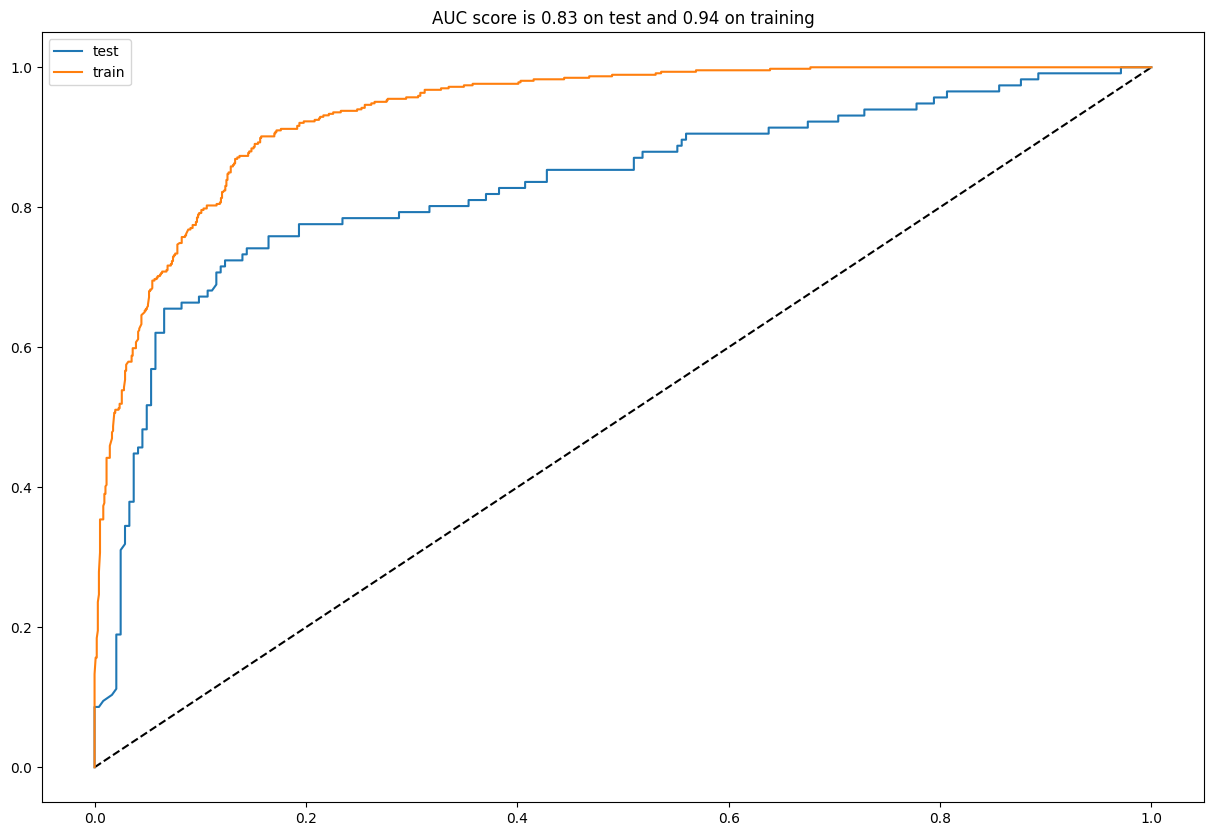

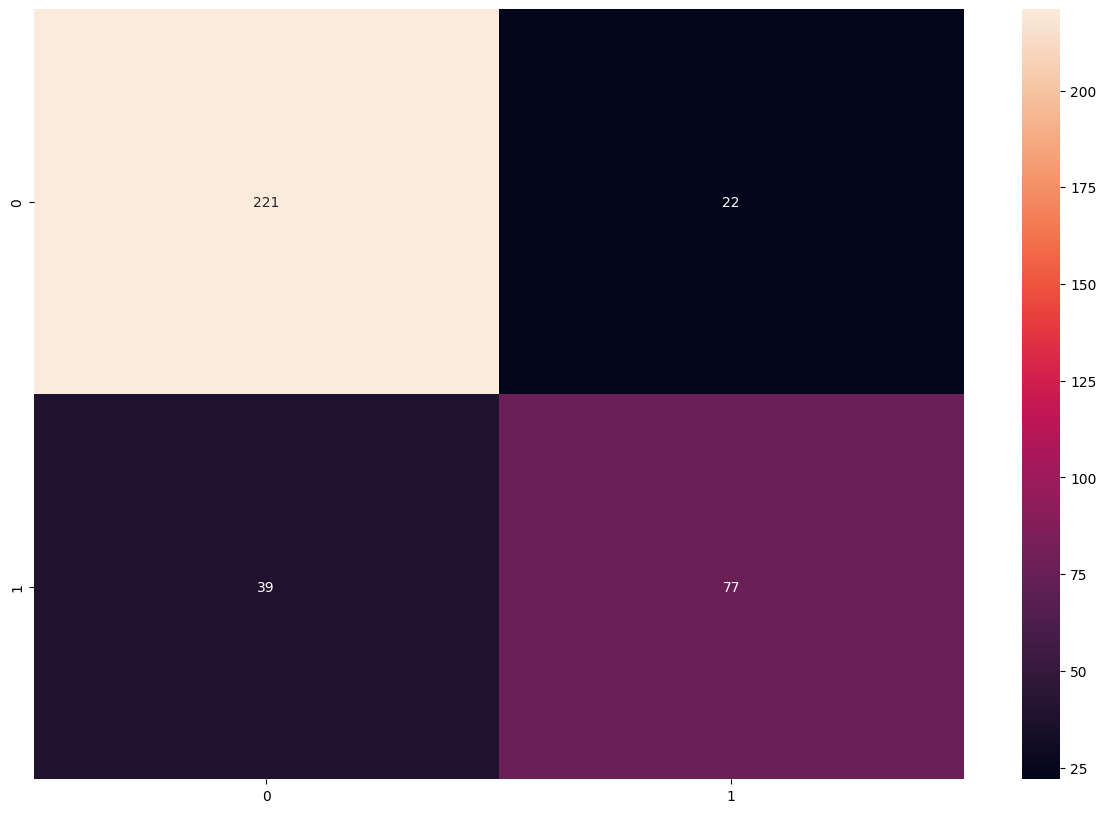

Feature ranking: XGBClassifier
1. feature: review_count (0.487238)
2. feature: stars (0.213786)
3. feature: is_claimed (0.049299)
4. feature: oldest_review (0.025380)
5. feature: reviews_per_week (0.023148)
6. feature: zstar_all (0.022875)
7. feature: price_tag (0.022549)
8. feature: business_density (0.021786)
9. feature: zprice_all (0.021214)
10. feature: business_similar_density (0.018780)
11. feature: votes_per_week (0.016985)
12. feature: std_of_stars (0.016838)
13. feature: zreview_count_all (0.016737)
14. feature: is_chain (0.016214)
15. feature: stars_linear_coef (0.014995)
16. feature: median_of_stars (0.012175)
17. feature: zreview_per_week_all (0.000000)


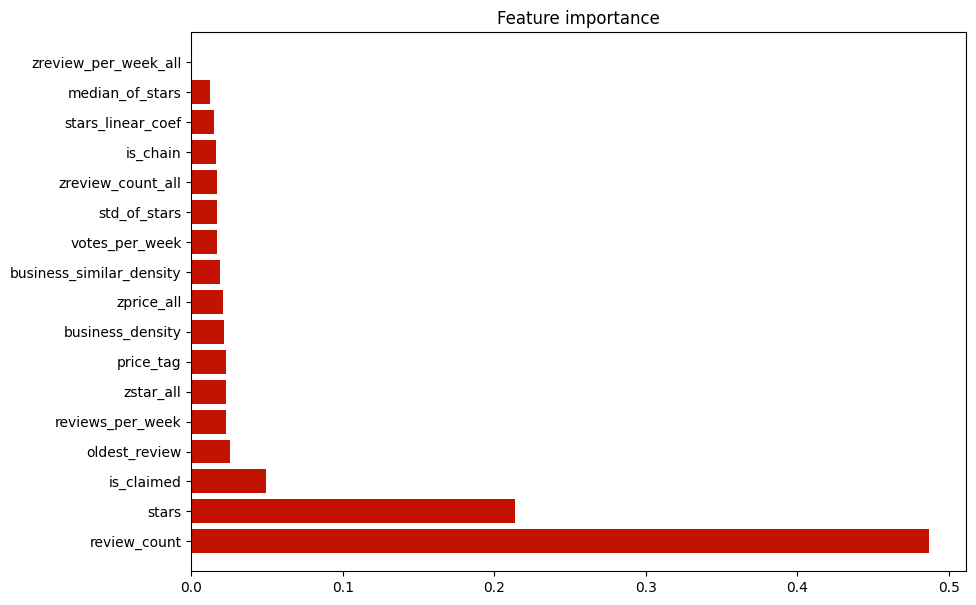

In [54]:
view_model(xgb_model_optimized, X_train, X_test, y_train, y_test)
analyze(xgb_model_optimized)
rank_features(xgb_model_optimized)